<a href="https://colab.research.google.com/github/SoumyaMajumder90/Deep-Learning-Notebook/blob/main/Implementation_on_deep_learning_on_IBM_hr_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('HR.csv')

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
print(df.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [14]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [15]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df['Attrition']
df['Gender']

,Gender
0,0
1,1
2,1
3,0
4,1
...,...
1465,1
1466,1
1467,1
1468,1


In [18]:
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [23]:
# Encode the 'OverTime' column
label_encoder = LabelEncoder()
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])  # Yes -> 1, No -> 0

In [25]:
# Convert all bool columns to int
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# Verify the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [29]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(units = 44, activation = 'relu'))
model.add(Dense(units= 22, activation = 'relu'))
Dropout(0.3)
model.add(Dense(units= 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
#early stopping
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [37]:
model_history = model.fit(X_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6924 - loss: 2.7459 - val_accuracy: 0.7960 - val_loss: 1.0737
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 2.8061 - val_accuracy: 0.8272 - val_loss: 7.4656
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7893 - loss: 5.9652 - val_accuracy: 0.8159 - val_loss: 3.0969
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7848 - loss: 2.1269 - val_accuracy: 0.8215 - val_loss: 3.2328
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7886 - loss: 5.5405 - val_accuracy: 0.8045 - val_loss: 0.7191
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6703 - loss: 8.8388 - val_accuracy: 0.8159 - val_loss: 3.0628
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - loss: 5.5070 - val_accuracy: 0.8272 - val_loss: 7.2973
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7810 - loss: 4.1301 - val_accuracy: 0.8244 - v

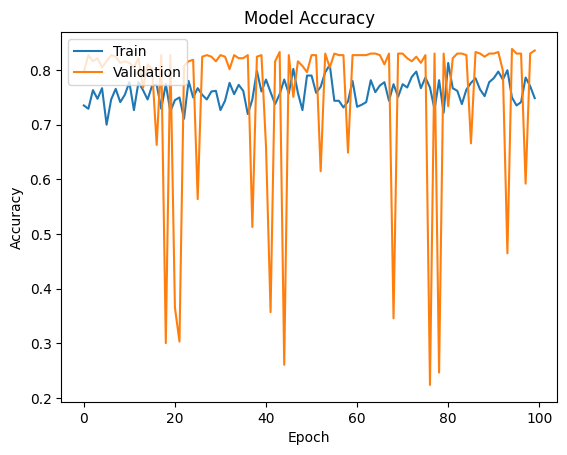

In [38]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
y_pred =model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


0.8537414965986394